# Example 05: Causal discovery with latent unobserved variables

-------------------------------------------

## Overview


 - AitiaExplorer allows you to see if there are latent, unoberved variables in the discovered causal graphs.
 - In the example below, we will see how AitiaExplorer shows these latent variables.

### Imports

In [1]:
import os
import sys
import math
import networkx as nx
import matplotlib.pyplot as plt
from pycausal.pycausal import pycausal
from IPython.display import display, HTML

module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)
from aitia_explorer.app import App

# stop the warning clutter
import warnings
warnings.filterwarnings('ignore')

### Set up for causal discovery

- First create an AitiaExplorer instance and using it to load some data into a pandas dataframe.
- We will be using the [HEPAR II](https://www.bnlearn.com/bnrepository/#hepar2) dataset.

In [3]:
aitia = App()

In [4]:
df = aitia.data.hepar2_10k_data()

In [5]:
df.head()

,alcoholism,vh_amn,hepatotoxic,THepatitis,hospital,surgery,gallstones,choledocholithotomy,injections,transfusion,...,spiders,jaundice,albumin,edge,irregular_liver,hbc_anti,hcv_anti,palms,hbeag,carcinoma
0,-0.406818,-0.462320,-0.296683,-0.21094,-1.071769,-0.862721,2.360149,2.517292,-0.810725,-0.442913,...,-0.515114,1.616390,-0.956489,-0.600145,2.58011,-0.322863,-0.04363,2.248763,-0.060108,-0.260176
1,-0.406818,-0.462320,-0.296683,-0.21094,-1.071769,1.159123,2.360149,2.517292,-0.810725,-0.442913,...,1.941318,1.616390,0.531284,1.666264,-0.38758,-0.322863,-0.04363,-0.444689,-0.060108,-0.260176
2,-0.406818,-0.462320,-0.296683,-0.21094,-1.071769,1.159123,-0.423702,-0.397252,1.233463,-0.442913,...,1.941318,-0.618663,0.531284,-0.600145,-0.38758,-0.322863,-0.04363,-0.444689,-0.060108,-0.260176
3,-0.406818,-0.462320,-0.296683,-0.21094,-1.071769,-0.862721,-0.423702,-0.397252,-0.810725,-0.442913,...,1.941318,-0.618663,0.531284,-0.600145,-0.38758,-0.322863,-0.04363,-0.444689,-0.060108,-0.260176
4,-0.406818,2.163005,-0.296683,-0.21094,-1.071769,-0.862721,-0.423702,-0.397252,-0.810725,-0.442913,...,-0.515114,-0.618663,0.531284,-0.600145,-0.38758,-0.322863,-0.04363,-0.444689,-0.060108,-0.260176


### Set up for causal discovery

- Next we will select the causal and feature selection algorithms and start the py-causal Java VM.

In [7]:
feature_selection_list = []
feature_selection_list.append(aitia.feature_selection.LINEAR_REGRESSION)
feature_selection_list.append(aitia.feature_selection.RANDOM_FOREST)

In [8]:
algorithm_list = []
algorithm_list.append(aitia.algo_runner.PC)
algorithm_list.append(aitia.algo_runner.RFCI_continuous)

In [9]:
pc = pycausal()
pc.start_vm()

- Now we will run the causal discovery with the number of feature set to a 30.

In [10]:
results, summary, target_graph = aitia.run_analysis( 
                                       df,
                                       target_graph_str=None, # no target graph, force system to create one
                                       n_features=30,
                                       feature_selection_list=feature_selection_list,
                                       algorithm_list=algorithm_list,
                                       pc=pc)

No target graph has been supplied.
The system will generate an approximate target graph using the greedy hill climbing algorithm.
Running causal discovery on features selected by LINEAR_REGRESSION
There are 2 latent edges in the reduced dataset
Running causal discovery using PC
Running causal discovery using RFCI-continuous
Completed causal discovery on features selected by LINEAR_REGRESSION
Running causal discovery on features selected by RANDOM_FOREST
There are 0 latent edges in the reduced dataset
Running causal discovery using PC
Running causal discovery using RFCI-continuous
Completed causal discovery on features selected by RANDOM_FOREST
Completed analysis.


### Display the results

- As we can see above the output from the analysis tells us there are latent variables.
- We can display the summary dataframe to get more details on the results.

In [11]:
display(HTML(summary.to_html()))

,No. of Features Req.,Causal Algorithm,Feature Selection Method,AUPRC,SHD
0,30,PC,LINEAR_REGRESSION,0.236150,111
1,30,RFCI-continuous,LINEAR_REGRESSION,0.240912,110
2,30,PC,RANDOM_FOREST,0.284535,102
3,30,RFCI-continuous,RANDOM_FOREST,0.267920,103


- It looks like the results from the RFCI / linear algebra run produced some latent variables.
- We can view the causal graph with these latent, unobserved variables using the results object.

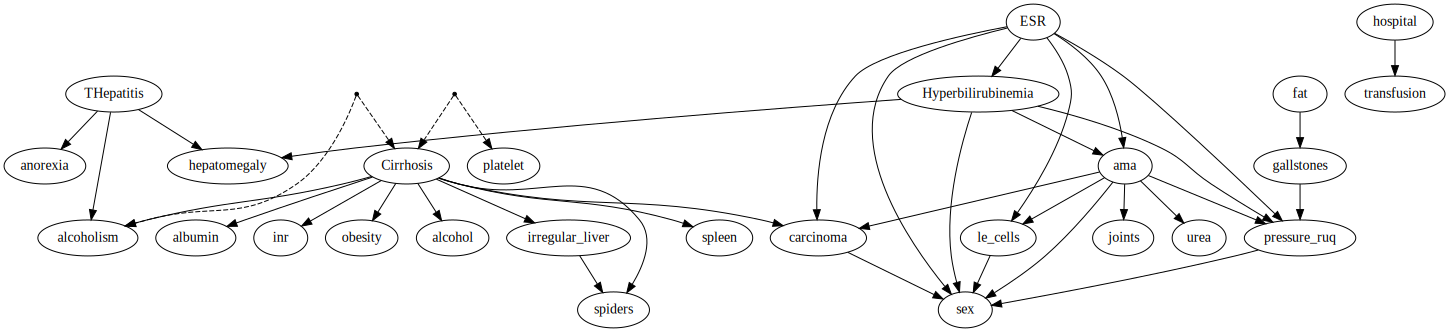

In [12]:
results[1].causal_graph_with_latent_edges.draw()

 - We can also get a list of the edges where these missing nodes are.

In [13]:
results[1].latent_edges

[('Cirrhosis', 'platelet'), ('Cirrhosis', 'alcoholism')]

- These values can then be used in further analysis, as required.